# Sentiment Analysis on Social Media

## 1. Data Collection

### 1.1 Initiation and preparation

In [132]:
#Please make sure to install this package before proceeding

# Tweets.csv : https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset
# text_emotions.csv : https://data.world/crowdflower/sentiment-analysis-in-text
# Twitter_date.csv : https://www.kaggle.com/code/nkenyor/twitter-sentiment-analysis
#Load, import, download all dependencies

!pip install pyspellchecker
from google.colab import drive

import pandas as pd
import numpy as np
import string
import re
import nltk
from nltk.corpus import stopwords

# Stemming/Lemmatizing Libraries
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

# Other text analysis dependencies
from spellchecker import SpellChecker
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
import spacy
from spacy import displacy

# Initiating other packages and libraries
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
nltk.download('maxent_ne_chunker')
spacy.cli.download("en_core_web_sm")
sp = spacy.load("en_core_web_sm")
pd.options.mode.chained_assignment = None
ENGLISH_WORDS = set(nltk.corpus.words.words()) #Pre load english words to optimize the app performance

# Text Representation Libraries
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Models Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional, GRU, Embedding, Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier


# Evaluation and testing metric
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, precision_recall_curve
import keras
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from tensorflow.keras.callbacks import EarlyStopping

# Dependencies to save, load Models
import tensorflow as tf
import pickle

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist

'''
Chat Words Conversion
'''
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
B=Be
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
Bih=Birth
BIHDAY= Birthday
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
BDAY=Birthday
BC=Because
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
I'M=I am
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
H3LL=Hell
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
N=In
OIC=Oh I See
OMG=Oh My God
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
R=Are
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
TY=Thank You
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
UR=Your
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
XOXO=Hugs and kisses
<3=love
****=Shit
*****=Bitch
"""

# Helper Functions to count the number of Words, Unique Words and Chacracters

def count_words(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return 0  # Return 0 for NaN or non-string values

def count_unique_words(text):
    if isinstance(text, str):
        return len(set(text.split()))
    else:
        return 0

def count_characters(text):
    if isinstance(text, str):
        return len(text)
    else:
        return 0

#Urban Dictionary mapper

chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### 1.2 Load the Dataset

In [133]:
# Initiliaze the Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Project/Tweets.csv')

# Convert text column Data Type to str
df["text"] = df["text"].astype(str)

# Drop textID column
df.drop(columns=["textID"], inplace=True)
df.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


### 1.3 Dataset Analysis

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           27481 non-null  object
 1   selected_text  27480 non-null  object
 2   sentiment      27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


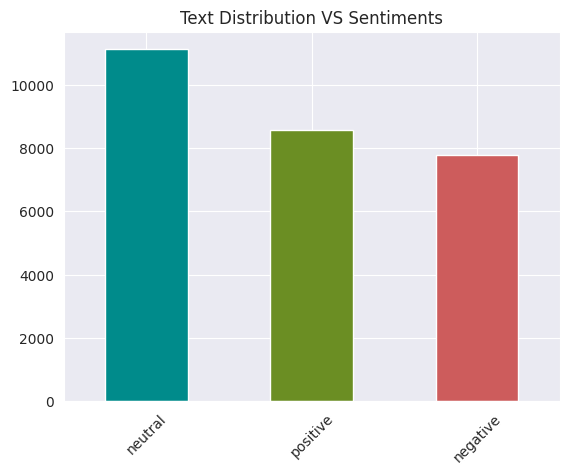

In [135]:
# Counting the number of class in the Dataset

count_Class= pd.value_counts(df["sentiment"], sort= True)
sns.set_style("darkgrid")
count_Class.plot(kind = 'bar', color = ["darkcyan", "olivedrab", "indianred"])
plt.title('Text Distribution VS Sentiments')
plt.xticks(rotation=45)
plt.show()

## 2. Text Preprocessing

In [136]:
df.dropna()
def preprocess(text, urban_dictionary=True, spellcheck=False, rm_unrelatedData=True, rm_stopwords=True, stem=False, lemmatize=True, rm_noneEnglish=False, rm_punctuations=False):
  text = ' '.join(text.split()) #remove white spaces

  if rm_unrelatedData:
    text = re.sub("`", "'", text) #Replace ` with ' e.g. I`m to I'm
    text = re.sub('@[^\s]+','@user',text) #Remove user names
    #text = re.sub('#[^\s]+','',text)
    text = re.sub('http[^\s]+','',text) #Remove Urls
    text = re.sub('[^\x00-\x7F]+','', text) #Remove non ASCII characters
    text = re.sub('&[^\s]*;','',text) # Remoe text used in HTML encoding e.g. &amp;
    #text = re.sub("^\d+\s|\s\d+\s|\s\d+$", '', text) #Will remove numbers that are not attached to words
    text = re.sub(r'\b\d+\b', '', text) #This will only remove digits that are not attached to words preventing the removal of words like h3ll
    #text = re.sub(r'\d+', '', text) #Remove digits

  if urban_dictionary:
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    text = " ".join(new_text)

  match(spellcheck):
    case 'pyspellchecker':
      try:
        correctedText = []
        missSpelledWords = spell.unknown(text.split()) #To avoid altering acryonyms
        for word in text.split(): # use tokenize method to split the text
          if word in missSpelledWords:
            correctedText.append(spell.correction(word))
          else:
            correctedText.append(word)
        text = ' '.join(correctedText) # join the corrected words with space
      except:
        text = text
    case 'textblob':
      text = str(TextBlob(text).correct())
    case _:
      pass

  if urban_dictionary:
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    text = " ".join(new_text)

  text = text.lower()

  match(stem):
    case 'p':
      stems = [PorterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 's':
      stems = [SnowballStemmer(language='english').stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 'l':
      stems = [LancasterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case _:
      pass

  if rm_stopwords:
    #stopNLTK = stopwords.words('english')
    stopSP = sp.Defaults.stop_words | {'im', 's', 'ive'} #spaCy defaults stopwrods | custom words
    text = word_tokenize(text)
    #text = [word for word in text if not word.lower() in set(stopwords.words('english'))]
    text = [word for word in text if not word.lower() in set(stopSP)]
    text = ' '.join(text)

  if lemmatize:
    text = " ".join([WordNetLemmatizer().lemmatize(word) for word in text.split()])
    #text = " ".join([WordNetLemmatizer().lemmatize(word) for word in word_tokenize(text)])

  if rm_noneEnglish:
    text = text.split(' ')
    text = [word for word in text if word in ENGLISH_WORDS]
    text = ' '.join(text)

  if rm_punctuations:
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

  return text

df['text P'] = df['text'].apply(preprocess)

df.head(5000)


,text,selected_text,sentiment,text P
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"responded , going"
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego ! ! !
2,my boss is bullying me...,bullying me,negative,bos bullying ...
3,what interview! leave me alone,leave me alone,negative,interview ! leave
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"son * * * * , release bought"
...,...,...,...,...
4995,look like i can only quick post from the dash...,look like i can only quick post from the dashb...,neutral,look like quick post dashboard
4996,Thanks Elaine. I`m clipping reviews for her s...,Thanks,positive,thanks elaine . clipping review scrapbook .
4997,"K now that, that fiasco is all wrapped and goo...","K now that, that fiasco is all wrapped and goo...",positive,"k , fiasco wrapped good studying midterm = ("
4998,No. I won`t be back until the 7th,No. I won`t be back until the 7th,neutral,. wo 7th


In [137]:
# Dropping unrequired columns
df.drop(columns=['text', 'selected_text'], inplace=True)

## 4. Text Representation

### 4.1 Part-of-Speech (POS) Tagging

In [138]:
def posTagging(tweet):
  word_tokens = tweet.split(' ') #word_tokenize(tweet)
  return pos_tag(word_tokens)

df["text POS Tagging"] = df["text P"].apply(posTagging)
df.head()

,sentiment,text P,text POS Tagging
0,neutral,"responded , going","[(responded, VBD), (,, ,), (going, VBG)]"
1,negative,sooo sad miss san diego ! ! !,"[(sooo, JJ), (sad, JJ), (miss, NN), (san, JJ),..."
2,negative,bos bullying ...,"[(bos, NNS), (bullying, VBG), (..., :)]"
3,negative,interview ! leave,"[(interview, NN), (!, .), (leave, VB)]"
4,negative,"son * * * * , release bought","[(son, NN), (*, NNP), (*, NNP), (*, NNP), (*, ..."


### 4.2 Named Entity Recognition (NER)

In [139]:
def spacyLargeNER(document):
  return {(ent.text.strip(), ent.label_) for ent in sp(document).ents}

# Selecting a subset of the DataFrame
subset = df['text P'].iloc[1000:2000]

# Convert the subset to a string
doc_subset = str(subset.values)

# Perform NER on the subset
nlp_subset = sp(doc_subset)

# Visualize the entities
displacy.render(sp(nlp_subset), style="ent", jupyter=True)

# spacy.explain('GPE') use spaCy built in function explain to find the definition of the TAG

### 4.3 TF-IDF

In [140]:
# max_features to set the maximum number of features e.g. TfidfVectorizer(max_features=20000)
vectorizer = TfidfVectorizer()
vectorized_text = vectorizer.fit_transform(df['text P'].values)

print("Sample of words with their representation: ")
print(list(vectorizer.vocabulary_.keys())[:5],'\n', vectorized_text[:5])

Sample of words with their representation: 
['responded', 'going', 'sooo', 'sad', 'miss'] 
   (0, 8946)	0.37387647216328745
  (0, 16825)	0.9274785084101596
  (1, 6281)	0.5694490543183406
  (1, 17358)	0.5394961156682109
  (1, 13268)	0.31221577311849014
  (1, 17278)	0.3294115649168001
  (1, 18562)	0.4227068104844635
  (2, 3881)	0.7914717868523984
  (2, 3517)	0.6112057023757809
  (3, 11889)	0.6272946274466541
  (3, 10712)	0.778782030080666
  (4, 3538)	0.5362924730864976
  (4, 16659)	0.626891823133383
  (4, 18541)	0.5651522143628842


### 4.4 N-Grams

In [141]:
# ngram_range(min_n, max_n) e.g. ngram_range=(1,2): Unigrams/Bigrams, ngram_range=(2,2): only Bigrams
vectorizer = TfidfVectorizer(ngram_range=(2,2))
vectorized_text = vectorizer.fit_transform(df['text P'].values)

print("Sample of words with their representation: ")
print(list(vectorizer.vocabulary_.keys())[:5], '\n', vectorized_text[:5])

Sample of words with their representation: 
['responded going', 'sooo sad', 'sad miss', 'miss san', 'san diego'] 
   (0, 80284)	1.0
  (1, 82606)	0.4657712371377705
  (1, 63161)	0.5498226983711142
  (1, 82133)	0.4657712371377705
  (1, 88847)	0.5136237043460985
  (2, 11388)	1.0
  (3, 49057)	1.0
  (4, 79783)	0.7071067811865475
  (4, 88419)	0.7071067811865475


### 4.5	Word Embeddings

In [142]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd

tokenized_text = [word_tokenize(text.lower()) for text in df['text P']]

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)
model.save("/content/drive/MyDrive/Colab Notebooks/NLP/Project/word2vec_model.bin")
# Test the Word2Vec model
word = 'good'
similar_words = model.wv.most_similar(word)

print(f"Words similar to '{word}': {similar_words}")


Words similar to 'good': [('monday', 0.9876077771186829), ('great', 0.9859227538108826), ('hope', 0.9854400753974915), ('morning', 0.9837629795074463), ('luck', 0.9831559658050537), ('nice', 0.9815002083778381), ('fun', 0.9807761311531067), ('friday', 0.9807319045066833), ('weekend', 0.9797565340995789), ('enjoy', 0.9771249890327454)]


## 5. Text Classification

In [143]:
# Drop neutral comments because it's they are not covered in our scope
df.drop(df[df['sentiment'] == 'neutral'].index, inplace=True)

# Label the sentiment in preperation for Data Modelling
df['sentiment'] = df['sentiment'].map( {'negative': 0, 'positive': 1} )

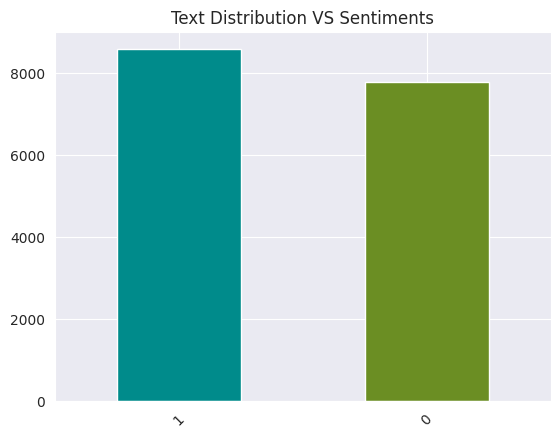

In [144]:
# Counting the total number of tweets per sentiment
count_Class= pd.value_counts(df["sentiment"], sort= True)
sns.set_style("darkgrid")
count_Class.plot(kind = 'bar', color = ["darkcyan", "olivedrab"])
plt.title('Text Distribution VS Sentiments')
plt.xticks(rotation=45)
plt.show()

In [145]:
data_negative = df[df['sentiment'] == 0].copy()
data_positive = df[df['sentiment'] == 1].copy()

# Import the dependencies
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a function to plot for each category
def show_wordcloud(df, title, color = 'ocean_r', bg_color='lightgrey'):
    text = ' '.join(df['text P'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color=bg_color,
                    colormap=color, width=800, height=600).generate(text)

    plt.figure(figsize=(10,10), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

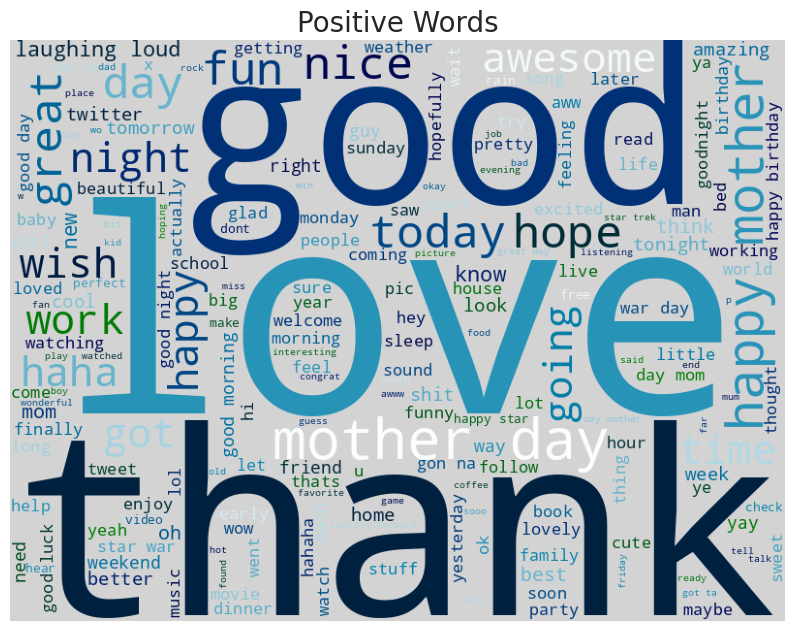

In [146]:
show_wordcloud(data_positive, 'Positive Words', 'ocean_r', 'lightgrey')

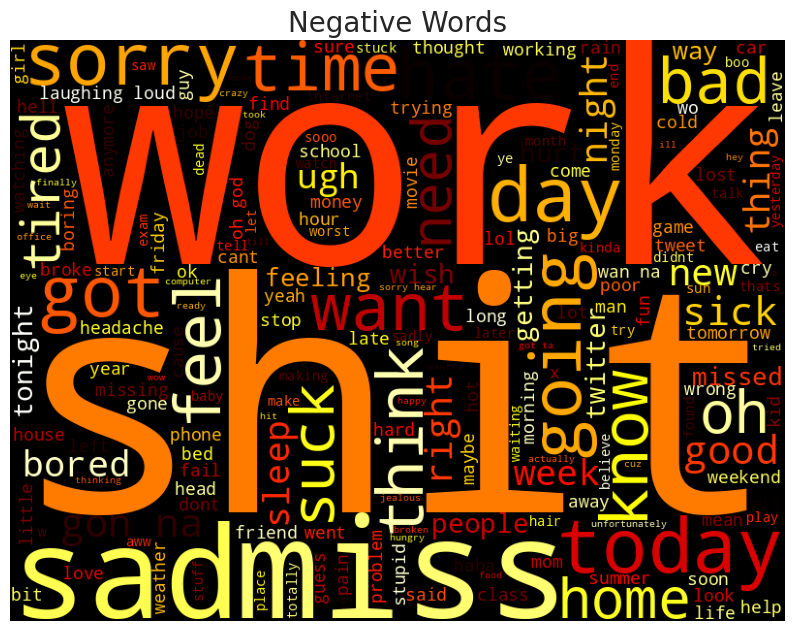

In [147]:
show_wordcloud(data_negative, 'Negative Words', 'hot', 'black')

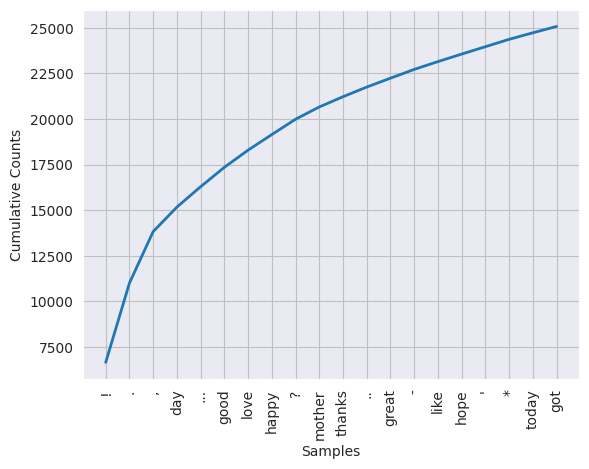

In [148]:
# Plot for positive sentiments
text_data = data_positive['text P'].str.cat(sep=' ')
tokens = nltk.tokenize.word_tokenize(text_data)
fdist = FreqDist(tokens)
fdist.plot(20, cumulative=True)
plt.show()

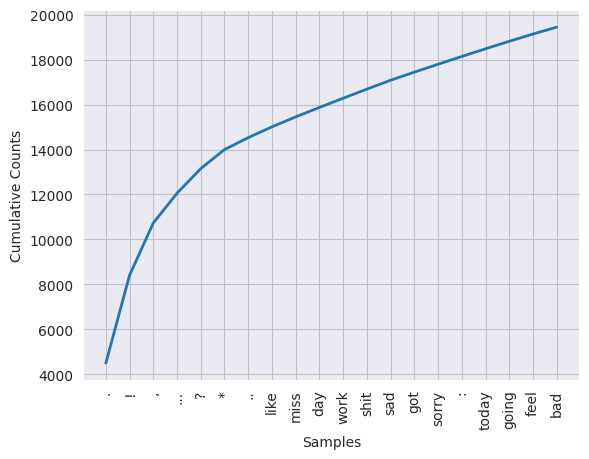

In [149]:
# Plot for negative sentiments
text_data = data_negative['text P'].str.cat(sep=' ')
tokens = nltk.tokenize.word_tokenize(text_data)
fdist = FreqDist(tokens)
fdist.plot(20, cumulative=True)
plt.show()

## 6. Evaluation, Inference

[Random Forest Classifier]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1567
           1       0.86      0.88      0.87      1706

    accuracy                           0.86      3273
   macro avg       0.86      0.86      0.86      3273
weighted avg       0.86      0.86      0.86      3273



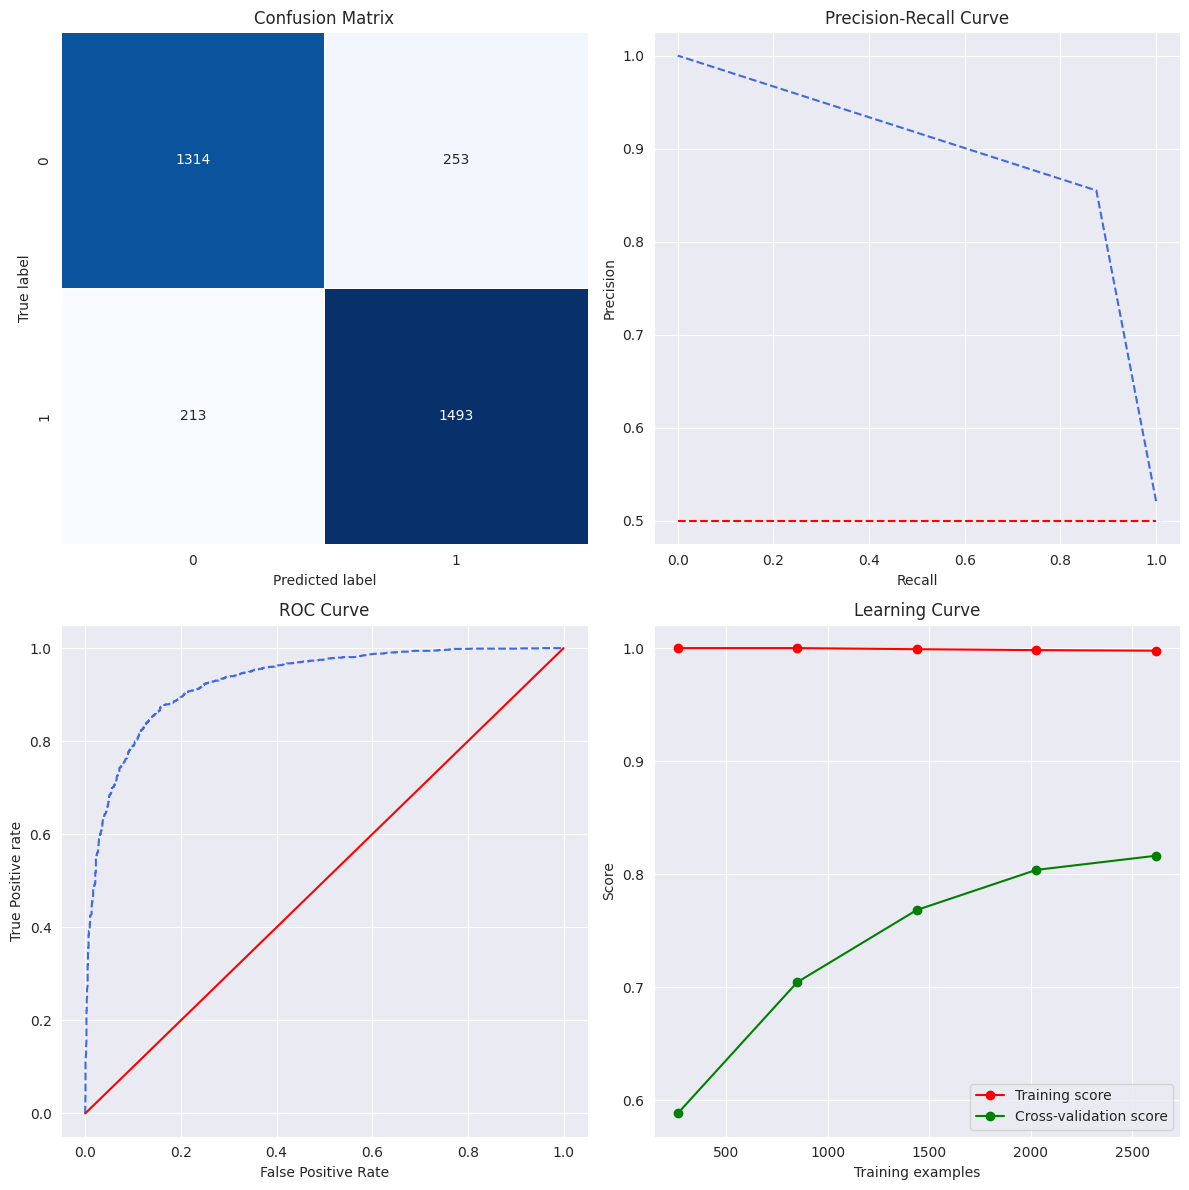

[Logistic Regression]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1567
           1       0.87      0.87      0.87      1706

    accuracy                           0.86      3273
   macro avg       0.86      0.86      0.86      3273
weighted avg       0.86      0.86      0.86      3273



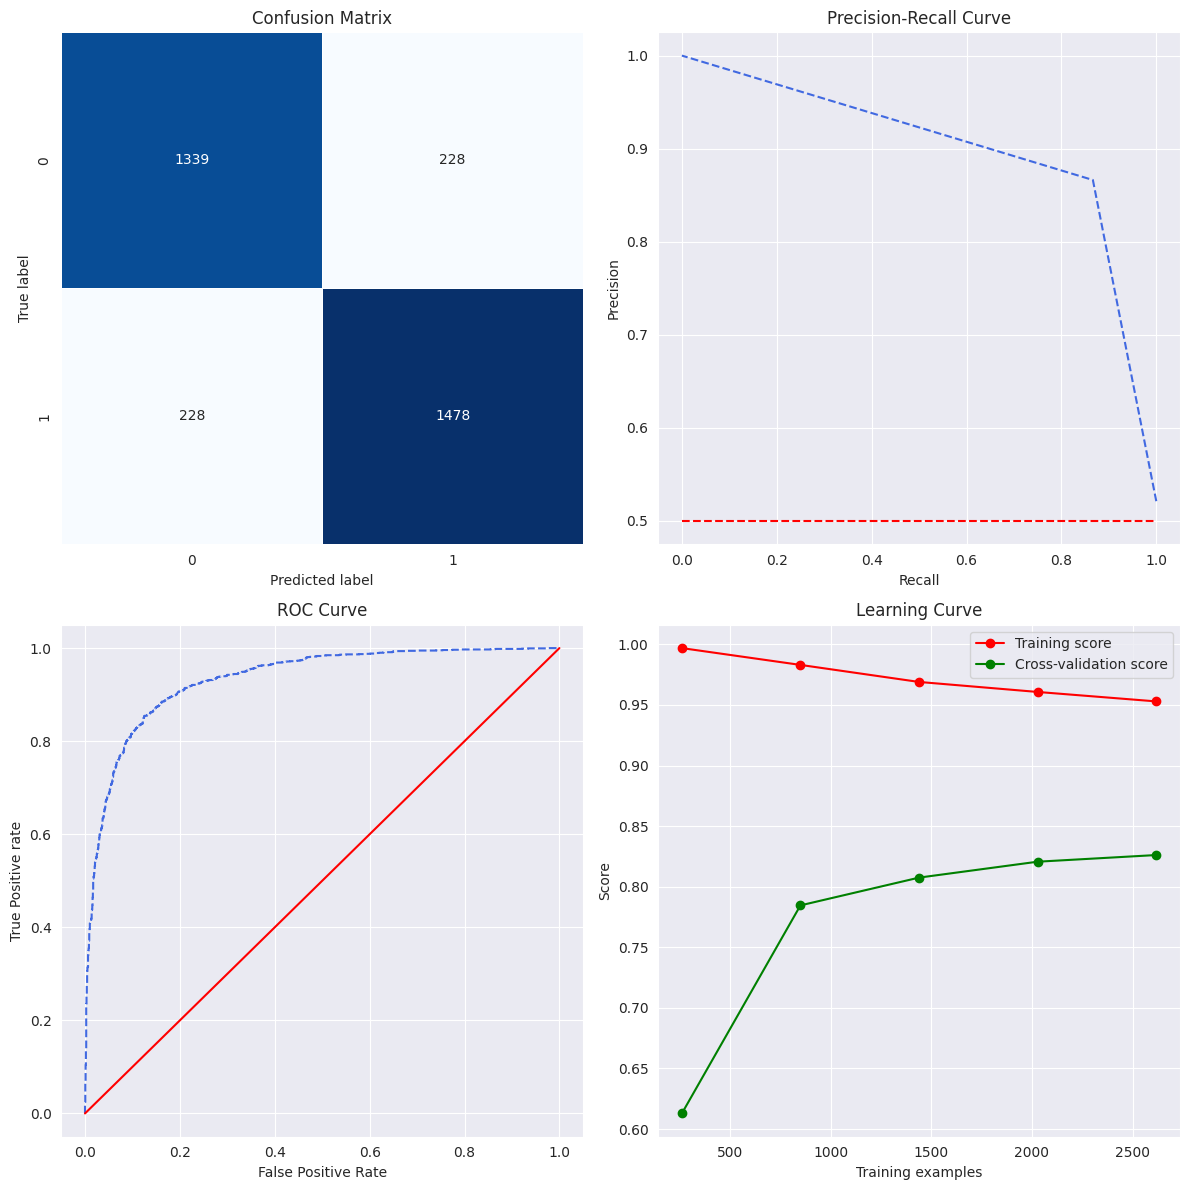

[Naive Bayes]
              precision    recall  f1-score   support

           0       0.88      0.80      0.83      1567
           1       0.83      0.90      0.86      1706

    accuracy                           0.85      3273
   macro avg       0.85      0.85      0.85      3273
weighted avg       0.85      0.85      0.85      3273



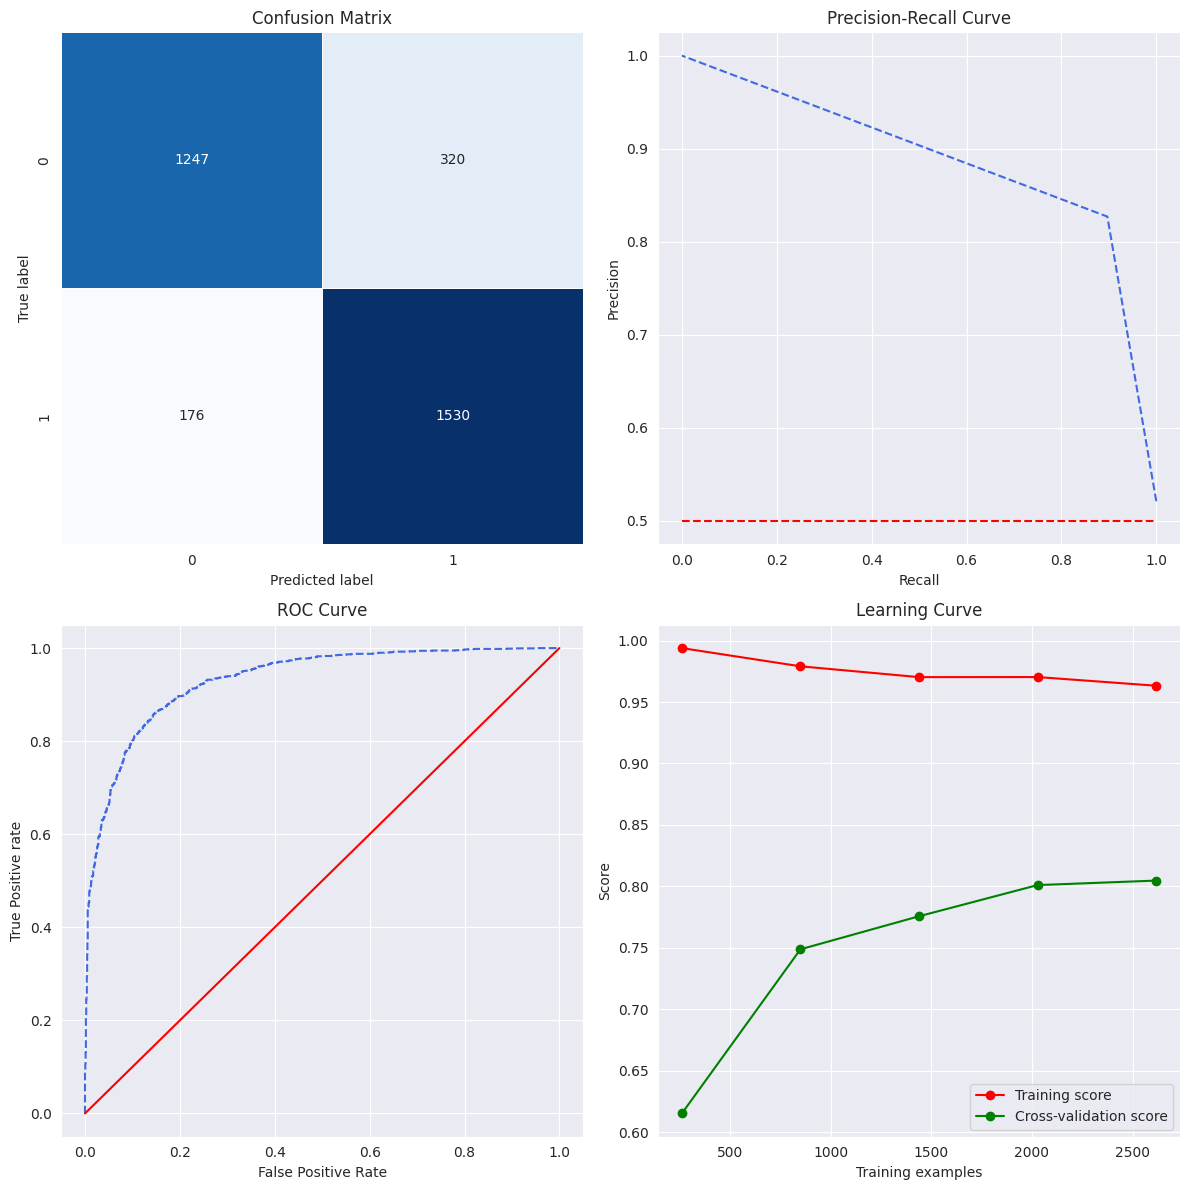

[K Neighbors Classifier]
              precision    recall  f1-score   support

           0       0.52      0.99      0.68      1567
           1       0.96      0.15      0.25      1706

    accuracy                           0.55      3273
   macro avg       0.74      0.57      0.47      3273
weighted avg       0.75      0.55      0.46      3273



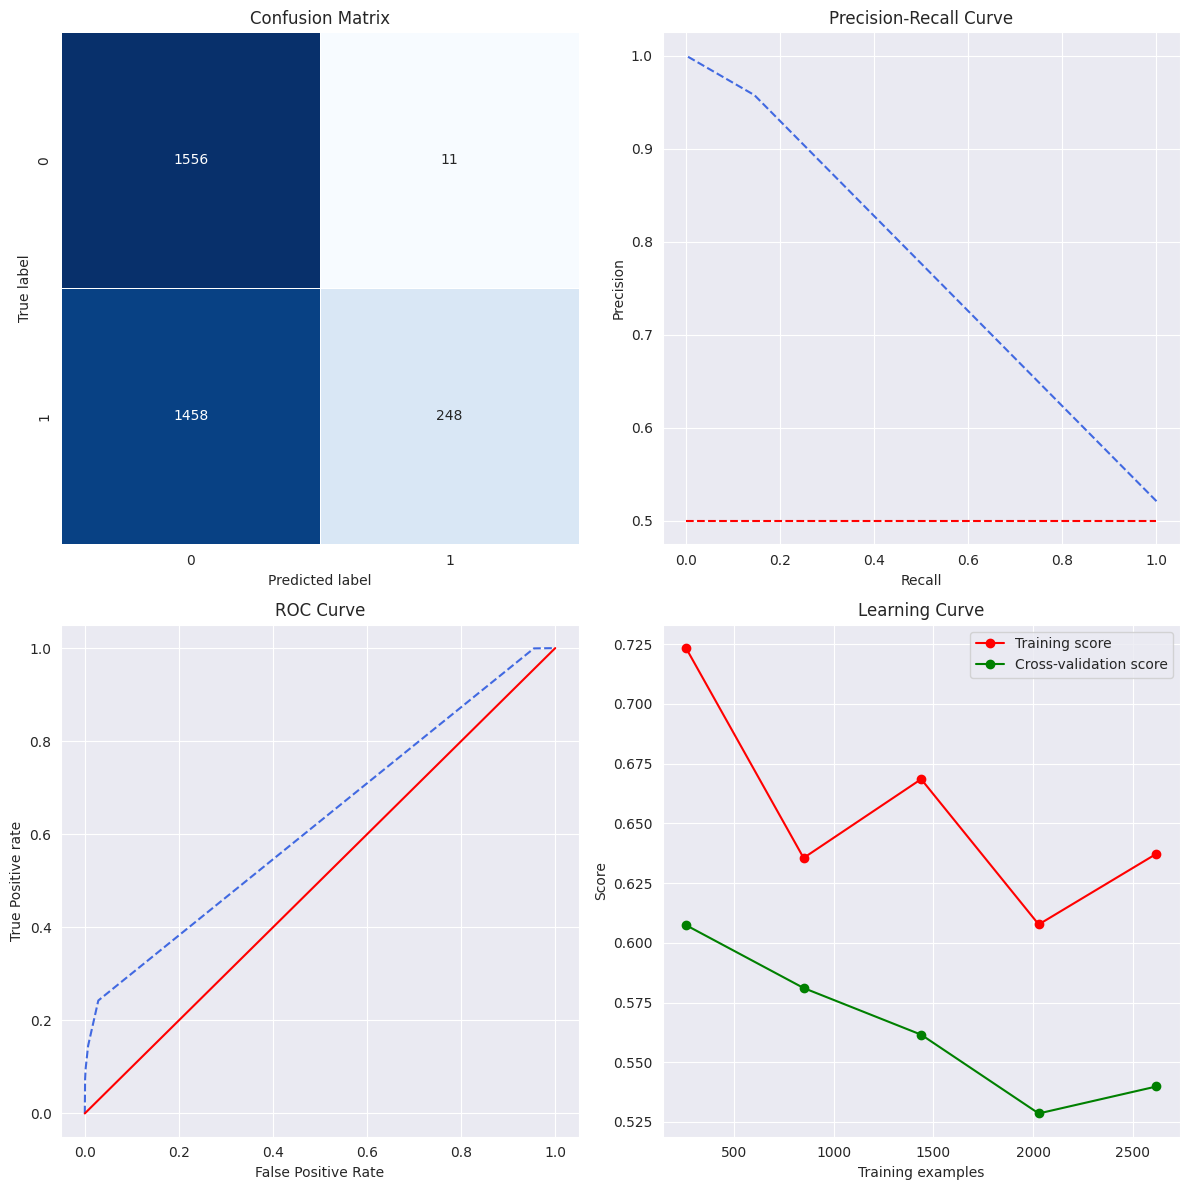

[SVC]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1567
           1       0.87      0.88      0.87      1706

    accuracy                           0.87      3273
   macro avg       0.87      0.87      0.87      3273
weighted avg       0.87      0.87      0.87      3273



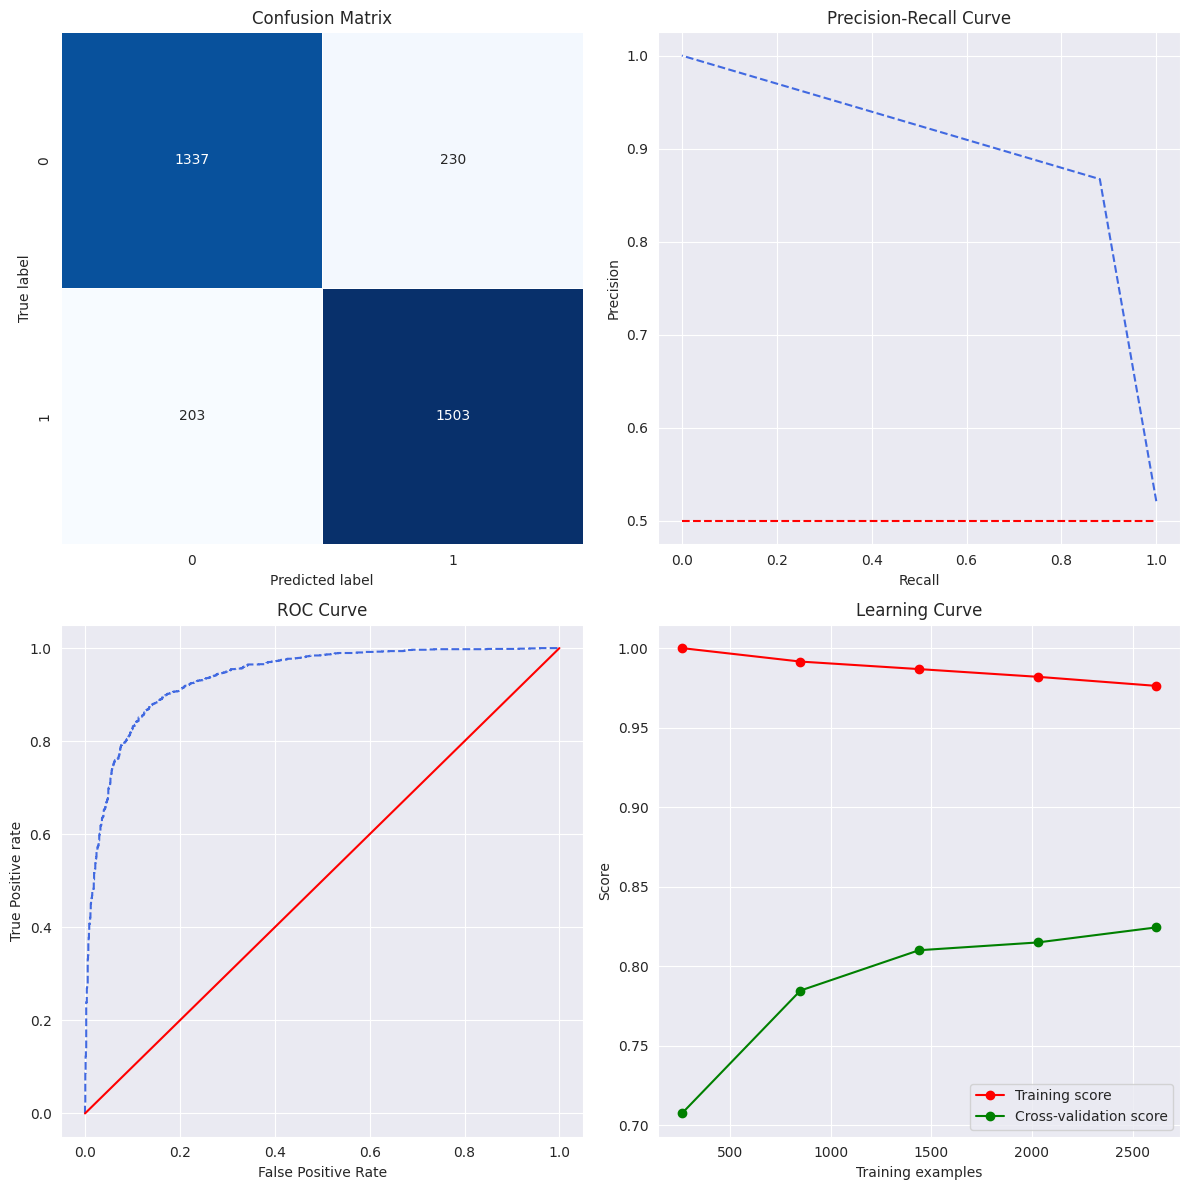

[LightGBM]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1567
           1       0.88      0.82      0.85      1706

    accuracy                           0.85      3273
   macro avg       0.85      0.85      0.85      3273
weighted avg       0.85      0.85      0.85      3273



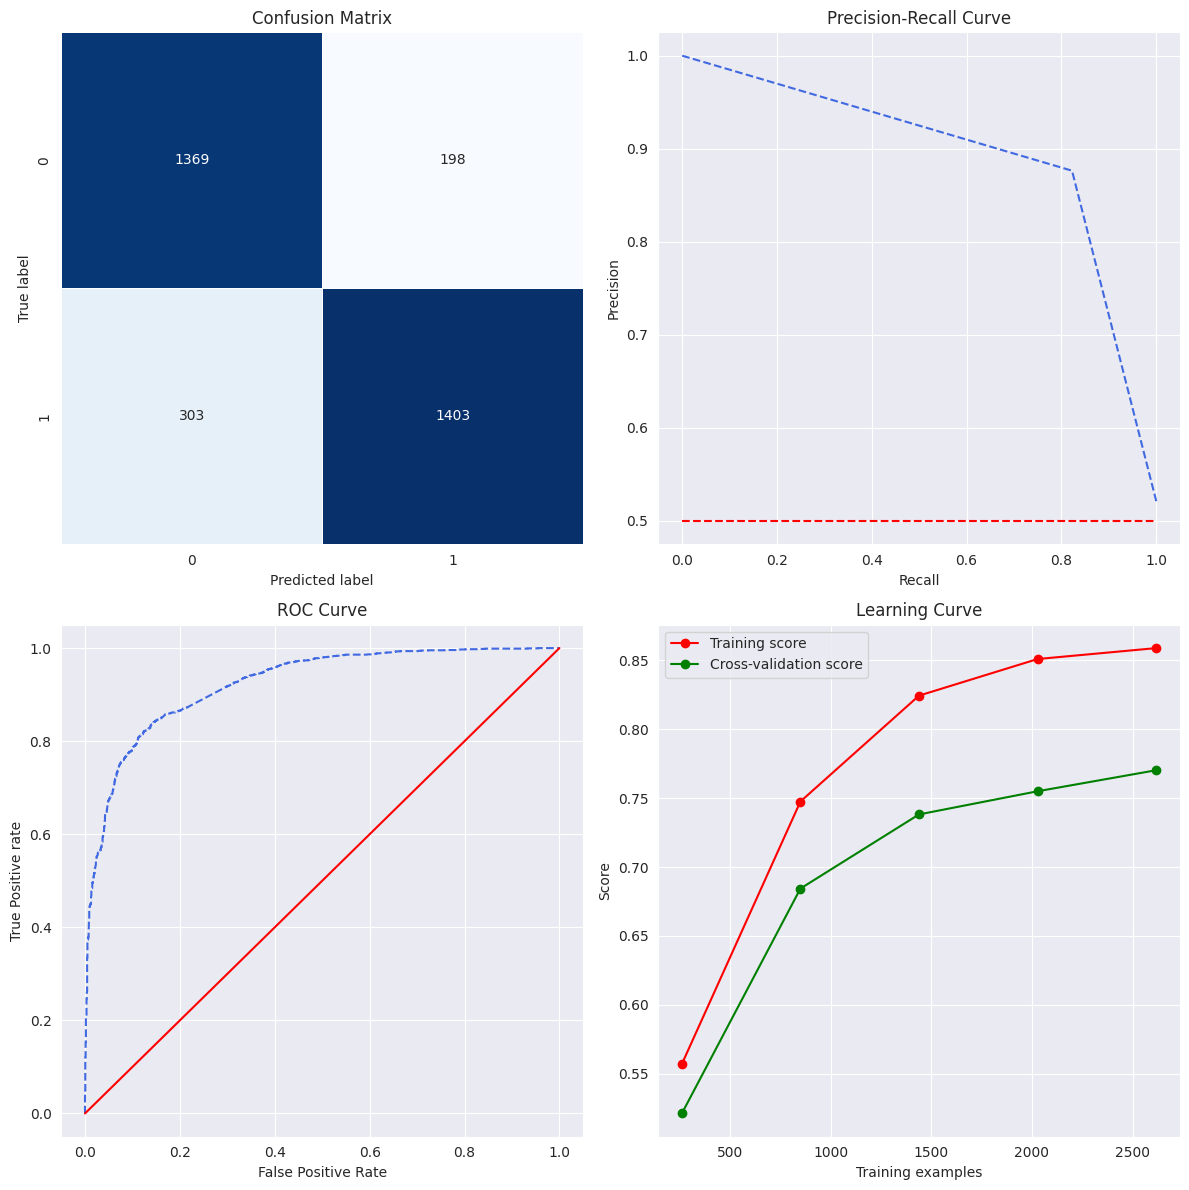

[SimpleRNN]
Epoch 1/5
410/410 [==============================] - 7s 13ms/step - loss: 0.4315 - accuracy: 0.7946 - val_loss: 0.3520 - val_accuracy: 0.8506
Epoch 2/5
410/410 [==============================] - 6s 15ms/step - loss: 0.2070 - accuracy: 0.9237 - val_loss: 0.3859 - val_accuracy: 0.8414
Epoch 3/5
410/410 [==============================] - 5s 12ms/step - loss: 0.1186 - accuracy: 0.9609 - val_loss: 0.4733 - val_accuracy: 0.8353
Epoch 4/5
410/410 [==============================] - 4s 11ms/step - loss: 0.0708 - accuracy: 0.9772 - val_loss: 0.5217 - val_accuracy: 0.8307
Epoch 5/5
103/103 [==============================] - 1s 4ms/step
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_36 (Embedding)    (None, 12, 24)            343800    
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 24)                1176      
  

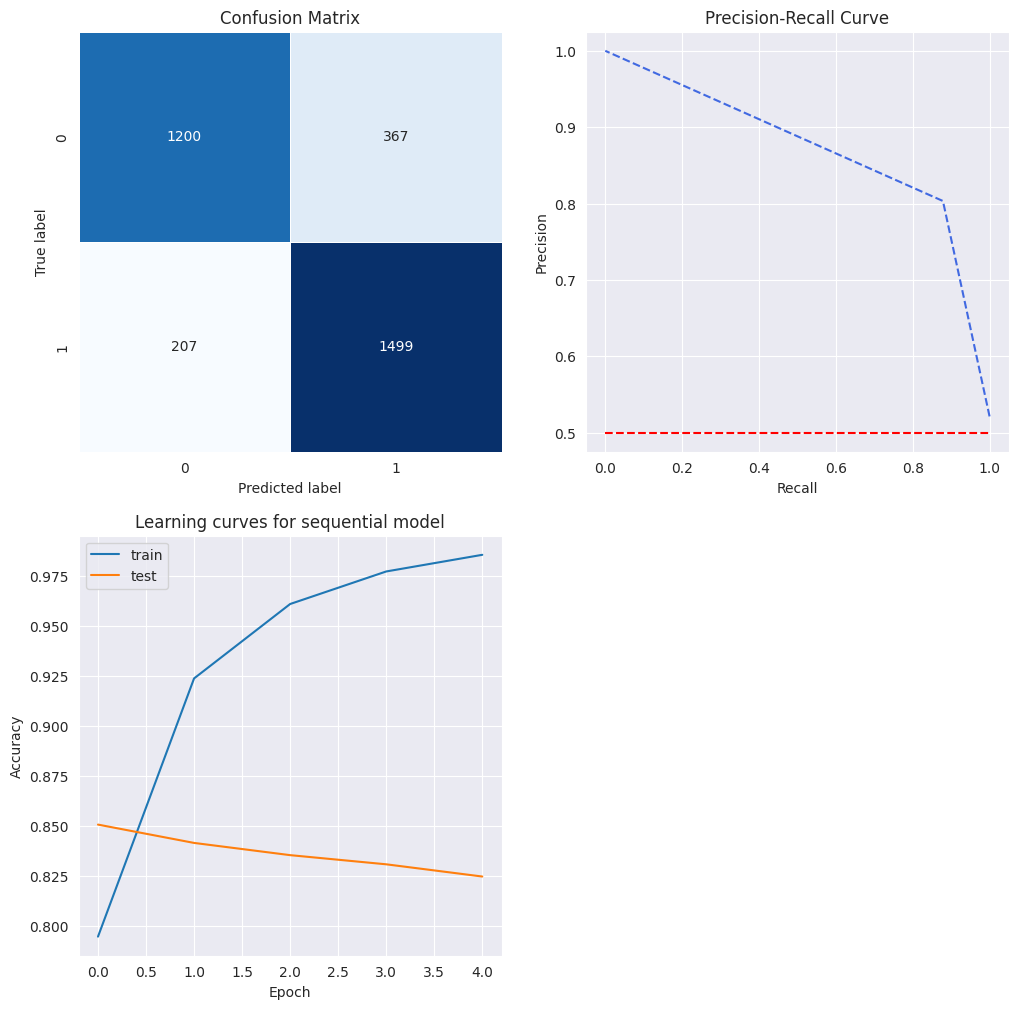

[LSTM]
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


410/410 [==============================] - 10s 18ms/step - loss: 0.4211 - accuracy: 0.7895 - val_loss: 0.3366 - val_accuracy: 0.8543
Epoch 2/5
410/410 [==============================] - 9s 22ms/step - loss: 0.2100 - accuracy: 0.9228 - val_loss: 0.3751 - val_accuracy: 0.8475
Epoch 3/5
410/410 [==============================] - 7s 18ms/step - loss: 0.1357 - accuracy: 0.9568 - val_loss: 0.4685 - val_accuracy: 0.8417
Epoch 4/5
410/410 [==============================] - 7s 18ms/step - loss: 0.0996 - accuracy: 0.9696 - val_loss: 0.4838 - val_accuracy: 0.8356
Epoch 5/5
103/103 [==============================] - 1s 4ms/step
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_37 (Embedding)    (None, 12, 24)            343800    
                                                                 
 lstm_18 (LSTM)              (None, 64)                22784     
                       

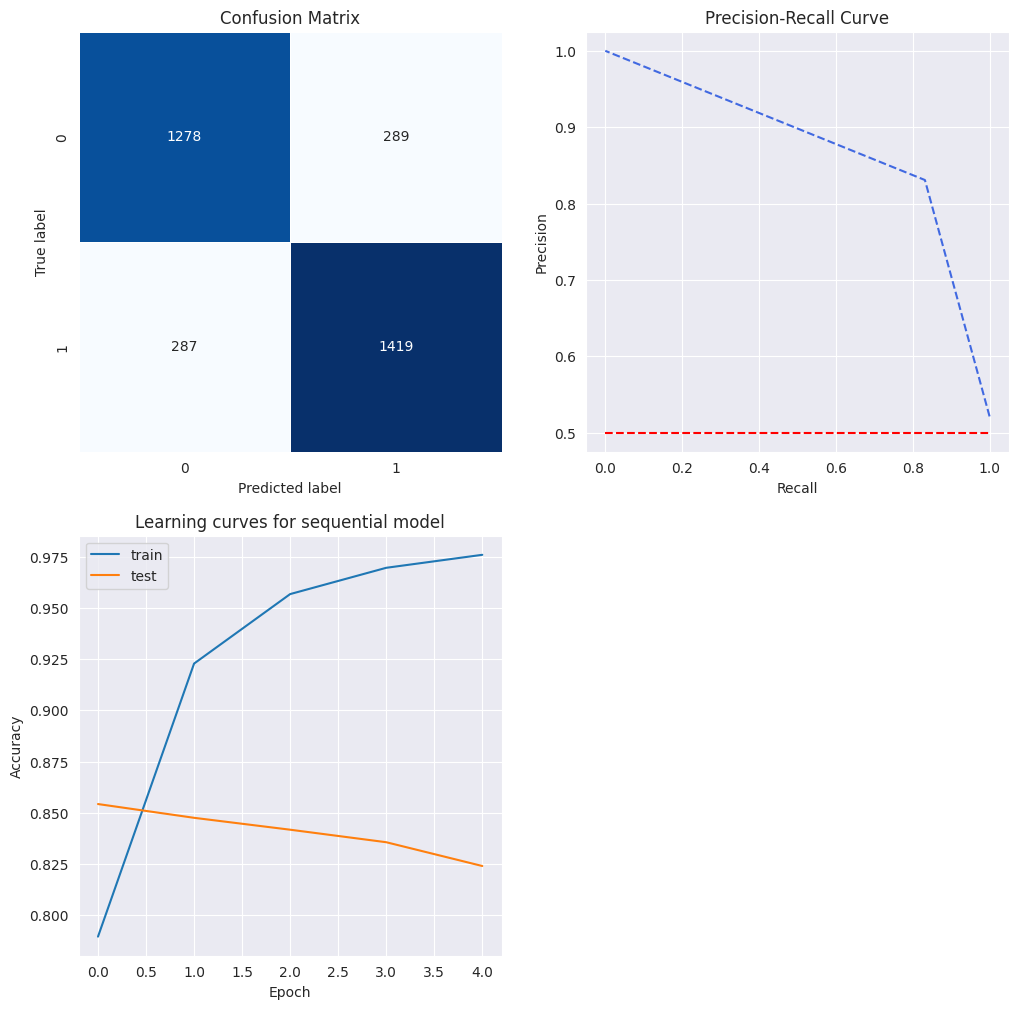

[BI-LSTM]
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


410/410 [==============================] - 26s 53ms/step - loss: 0.4007 - accuracy: 0.8073 - val_loss: 0.3514 - val_accuracy: 0.8472
Epoch 2/5
410/410 [==============================] - 21s 51ms/step - loss: 0.1926 - accuracy: 0.9296 - val_loss: 0.3799 - val_accuracy: 0.8491
Epoch 3/5
410/410 [==============================] - 21s 51ms/step - loss: 0.1164 - accuracy: 0.9612 - val_loss: 0.4325 - val_accuracy: 0.8362
Epoch 4/5
410/410 [==============================] - 21s 51ms/step - loss: 0.0776 - accuracy: 0.9747 - val_loss: 0.5703 - val_accuracy: 0.8317
Epoch 5/5
103/103 [==============================] - 1s 6ms/step
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_38 (Embedding)    (None, 12, 128)           1833600   
                                                                 
 bidirectional_9 (Bidirecti  (None, 128)               98816     
 onal)              

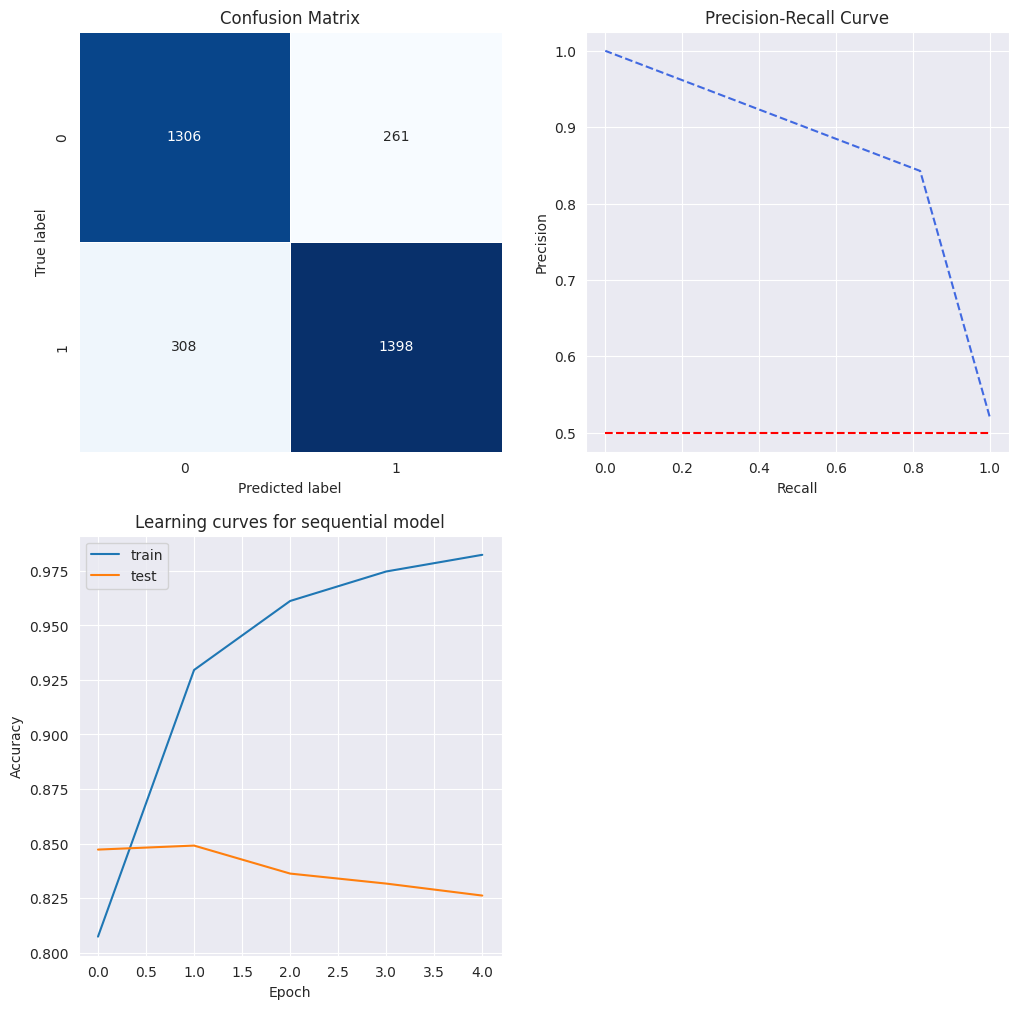

[GRU]
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


410/410 [==============================] - 11s 22ms/step - loss: 0.4695 - accuracy: 0.7439 - val_loss: 0.3404 - val_accuracy: 0.8537
Epoch 2/5
410/410 [==============================] - 7s 16ms/step - loss: 0.2193 - accuracy: 0.9178 - val_loss: 0.3446 - val_accuracy: 0.8485
Epoch 3/5
410/410 [==============================] - 7s 17ms/step - loss: 0.1394 - accuracy: 0.9526 - val_loss: 0.4203 - val_accuracy: 0.8393
Epoch 4/5
410/410 [==============================] - 8s 20ms/step - loss: 0.0994 - accuracy: 0.9684 - val_loss: 0.4878 - val_accuracy: 0.8255
Epoch 5/5
103/103 [==============================] - 1s 4ms/step
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_39 (Embedding)    (None, 12, 24)            343800    
                                                                 
 gru_9 (GRU)                 (None, 24)                3600      
                       

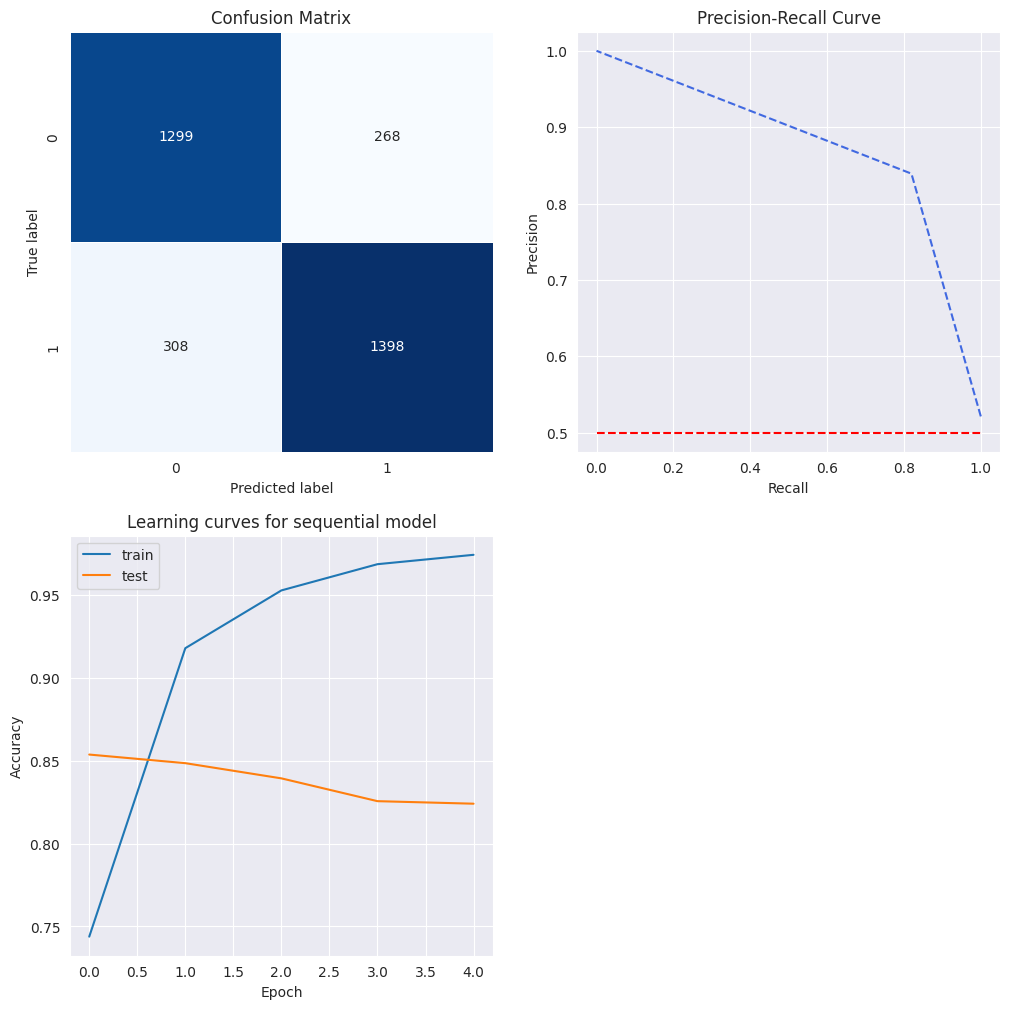

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [150]:

import pickle

def plot_results(name, model, X_test, Y_test, predictions, history):
    mtx = confusion_matrix(Y_test, predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.title('Confusion Matrix')
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, cmap="Blues", cbar=False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    precision, recall, _ = precision_recall_curve(Y_test, predictions)
    plt.subplot(222)
    plt.plot(recall, precision, linestyle='--', color='royalblue')
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='red') # Adding baseline
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    # roc curve for tpr = fpr
    if name not in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']: #predict_proba is not available for sequential models.
      random_probs = [0 for i in range(len(Y_test))]
      p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
      pred_prob = model.predict_proba(X_test)
      fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
      plt.subplot(223)
      plt.plot(fpr, tpr, linestyle='--',color='royalblue')
      plt.plot(p_fpr, p_tpr, color='red')
      # title
      plt.title('ROC Curve')
      # x label
      plt.xlabel('False Positive Rate')
      # y label
      plt.ylabel('True Positive rate')
      plt.savefig('ROC',dpi=300)
      plt.tight_layout(pad=1.20)

      #  Learning curve
      train_sizes, train_scores, test_scores = learning_curve(model, X_test, Y_test)
      train_scores_mean = np.mean(train_scores, axis=1)
      test_scores_mean = np.mean(test_scores, axis=1)
      plt.subplot(224)
      plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
      plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
      plt.xlabel('Training examples')
      plt.ylabel('Score')
      plt.title('Learning Curve')
      plt.legend(loc="best")
      plt.tight_layout()
    else:
      plt.subplot(223)
      plt.plot(history.history['accuracy'], label='train')
      plt.plot(history.history['val_accuracy'], label='test')
      plt.title('Learning curves for sequential model')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.legend()
    plt.show()

def performance_metrices(model, Y_test, predictions):
      accuracy = accuracy_score(Y_test, predictions)
      f1 = f1_score(Y_test, predictions, average='macro')
      recall_sc = recall_score(Y_test, predictions)
      precision_sc = precision_score(Y_test, predictions)
      print(model.summary())
      print('\nScores')
      print(f'Recall: {precision_sc}')
      print(f'Precision: {recall_sc}')
      print(f'F1: {f1}')
      print(f'Accuracy: {accuracy}\n')

# Split Data into Train and Validation Sets (80% Train, 20% Test)
X = df['text P'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=124)

# Vectorization for the Classifier Models
#vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Setting the parameters for the Sequential Model, sequencing and encoding
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

max_length = 12
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
#    'KNN': KNeighborsClassifier(),
#'Linear SVC': LinearSVC(class_weight='balanced'),
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'K Neighbors Classifier': KNeighborsClassifier(), #n_neighbors=4
    'SVC': SVC(kernel='linear', probability=True),
    'LightGBM': LGBMClassifier(verbose=-1),
    'K Neighbors Classifier': KNeighborsClassifier(), #n_neighbors=4
    'SimpleRNN': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        SimpleRNN(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ]),
    'BI-LSTM': Sequential([
        Embedding(vocab_size, 128, input_length=max_length),
        Bidirectional(LSTM(64)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'GRU': Sequential([
        Embedding(vocab_size, 24, input_length=max_length),
        GRU(24, return_sequences=False),
        Dense(1, activation='sigmoid')
    ]),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=200,criterion='entropy'),
}

for name, model in models.items():
    print('='*160)
    print(f'[{name}]')
    if name in ['SimpleRNN', 'LSTM', 'BI-LSTM', 'GRU']:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history=model.fit(x=padded_train,
                  y=Y_train,
                  epochs=5,
                  validation_data=(padded_test, Y_test), verbose=1,
                  callbacks=[early_stop]
                  )
        predictions= (model.predict(padded_test)>0.5).astype("int32")
        performance_metrices(model, Y_test, predictions)
        plot_results(name, model, padded_test, Y_test, predictions, history)
        model.save(f'{name}.h5')
    elif name == 'Gaussian Naive Bayes':
        model.fit(X_train_vectorized.toarray(), Y_train)
        predictions = model.predict(X_test_vectorized.toarray())
        print(classification_report(Y_test, predictions))
        plot_results(name, model, X_test_vectorized.toarray(), Y_test, predictions, None)
    else:
        model.fit(X_train_vectorized, Y_train)
        predictions = model.predict(X_test_vectorized)
        print(classification_report(Y_test, predictions))
        plot_results(name, model, X_test_vectorized, Y_test, predictions, None) # None, History is only available for Sequential Model
        # Save Sklearn Models
        with open(f'{name}.pkl', 'wb') as file:
          pickle.dump(model, file)

In [151]:


data = {
    'tweet': [
        'very bad',
        'Welcome to bahrain',
        '@Mohammed it was a fun weekend!',
        '@User Have a nice day.',
        'It is a #sad rainy day...',
        'LETS NAIL THIS!!!',
        'Welcome to Havana, I hope you enjoy your stay...',
        'I am very tired.',
        'Hope tired tired',
        ' this is not good',
    ]
}

df_test = pd.DataFrame(data)

df_test['tweet P'] = df_test['tweet'].apply(preprocess)

tweet_test = vectorizer.transform(df_test['tweet P'])
# Open saved Sklearn saved Model *.pkl
with open('Logistic Regression.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

prediction = loaded_model.predict(tweet_test)
mapped_predictions = ['negative' if pred == 0 else 'positive' for pred in prediction]

print(mapped_predictions)


['negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive']


In [152]:
# Load the Model, test on new data

s_model = tf.keras.models.load_model("spam_model")
with open('spam_model/tokenizer.pkl', 'rb') as input:
tokenizer = pickle.load(input)

from tensorflow.keras.preprocessing.text import Tokenizer
sms = ["Lottery won. You are given a free credit card offer with no emi for first month. call 7654437862 to claim your offer"]
#sms = ["hello! how are you? im visiting mom next week"]
sms_proc = t.texts_to_sequences(sms)
sms proc = pad sequences(sms proc, maxlen=max length, padding='post')

IndentationError: ignored